In [18]:
import numpy as np
from scipy.stats import beta, norm
import matplotlib.pyplot as plt

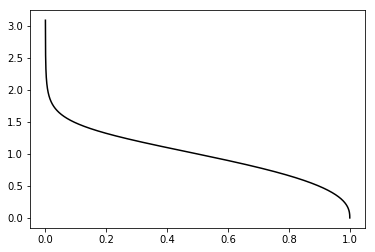

In [55]:
x = np.linspace(0,1, 10000)
a = 0.9
b = 1.4
y = beta.pdf(x, a, b)
plt.plot(x,y, "k-")
plt.show()

In [50]:
# simulation
y = np.random.beta(a, b, int(1.e5))

edep = y * 1.e5
reco_energies = np.random.normal(edep, 0.1 * edep)

(100, 1000000)

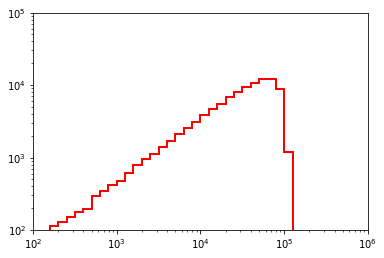

In [67]:
edges = np.linspace(2,7,51)
edges = 10 ** edges
plt.hist(reco_energies, bins=edges, histtype='step', color='red', linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.ylim([10**2, 10**5])
plt.xlim([10**2, 10**6])

In [60]:
def joint_pdf(erec, y):
    enu=1.e5
    edep = y * enu
    return norm.pdf(erec, edep, 0.1 * edep) * beta.pdf(y,a,b)

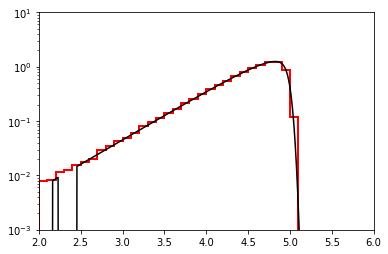

In [66]:
from scipy.integrate import quad

npts = int(1.e3)

pdf_vals = np.zeros(npts)
erec_pts = np.logspace(2,7,npts)
l10 = np.log(10)

for i in range(len(erec_pts)):
    log_erec_pt = np.log10(erec_pts[i]) 
    fint = lambda y: joint_pdf(10**log_erec_pt, y) * 10**log_erec_pt * l10
    pdf_vals[i] = quad(fint, 0, 1)[0] 
    i+=1
    
plt.plot(np.log10(erec_pts), pdf_vals, "k-")

edges = np.linspace(2,7,51)
plt.hist(np.log10(reco_energies), bins=edges, histtype='step', density=True, linewidth=2, color='red')

plt.yscale('log')
#plt.xscale('log')
plt.ylim([1.e-3, 10])
plt.xlim([2,6])
plt.show()